# Single transit search

## Simulate data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nuance.utils import transit
import jax
jax.config.update("jax_enable_x64", True)

/Users/lgrcia/code/dev/nuance/nuance/nuance.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


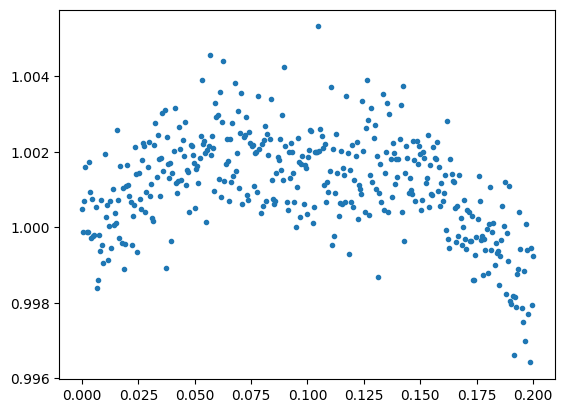

In [2]:
np.random.seed(42)
time = np.linspace(0, 0.2, 400)
diff_error = 0.001
X = np.vander(time, N=4, increasing=True)
w = [1., 0.05, -0.2, -0.5]
diff_flux = transit(time, 0.2/2, 0.05, 0.001) + np.random.normal(0., diff_error, size=len(time)) + X@w

plt.plot(time, diff_flux, ".")

## Single transit (linear) search

In [3]:
from nuance import Nuance

nu = Nuance(time, diff_flux, diff_error, X=X.T)

t0s = time.copy()
durations = np.linspace(0.01, 0.1, 10)
nu.linear_search(t0s, durations)

100%|██████████| 400/400 [00:00<00:00, 958.31it/s]


In [4]:
t0, D, _ = nu.search_data.best
mean, astro, noise = nu.models(t0, D)

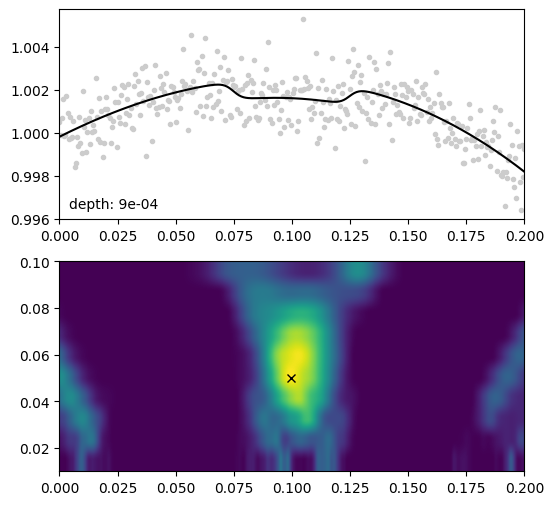

In [5]:
plt.figure(None, (6, 6))
plt.subplot(211)
plt.plot(time, diff_flux, ".", c="0.8")
plt.plot(time, mean + astro + noise, c="k")
plt.xlim(time.min(), time.max())
plt.text(0.02, 0.05, f"depth: {nu.depth(t0, D)[0]:2.0e}", transform=plt.gca().transAxes)
plt.subplot(212)
plt.plot(t0, D, "x", c="k")
nu.search_data.show_ll()

In [6]:
print(f"""
S/N\t{nu.snr(t0, D):.2f}
t0\t{t0:.5f} days
D\t{D:.2f} days
depth\t{nu.depth(t0, D)[0]:3.2e}
""")


S/N	5.38
t0	0.09975 days
D	0.05 days
depth	8.56e-04

